In [40]:
import datetime

# Get the current date and time
current_time = datetime.datetime.now()

# Print the current date and time
print("Timestamp:", current_time)

Timestamp: 2024-04-05 09:22:52.007173


In [41]:
# pip install ipykernal
# pip install pandas
# pip install numpy
#pip install matplotlib  
#pip install seaborn
#pip install statsmodels
# pip install scikit-learn
# pip install openpyxl

**Lab session 1**\
Use dataset of penguins to find the correlation between the columns and to draw the regression plot for each variable as well as heatmap and pairplot

**Lab session 2**\
To perform exploratory data analysis using data of penguins to find different trends and patterns in the data

**Lab session 3**\
To perform the EDA on --------------- to find the different patterns and trends in the given dataset

**Lab Session 4**\
Write compete detail of left join, right join, inner and outer join. Develop two dataframes of 15 rows with columns as
data1= id, Name, nationality,age\
data2= id, Marks in math, marks in science, marks in english, marks in history
and merge these dataframes using all types of joins.


## Lab session 5

Using the dataset of titanic, check the normal distribution of all numeric columns and use power transformation and quantile transformation methods (Whichever approperiate) to convert these columns as parametric distribited columns

## Lab session 6
Use the one hot encoding, ordinal encoding and label encoding to convert the categorical columns into encoded data using the data of tips

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=sns.load_dataset("titanic")
df.rename(columns={"sex":"gender"},inplace=True)
df.head()


,survived,pclass,gender,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [43]:
df.isnull().sum()

survived         0
pclass           0
gender           0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [44]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [45]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=5)
df["age"]=imputer.fit_transform(df[["age"]])

In [46]:
# Merging of data
data1={"id":[1,2,3,4,5],"Name":["Ali", "Ahmed","Asad","Usman","Ahmed"], "Age":[23,24,25,26,27]}
data1=pd.DataFrame(data1)
data1

,id,Name,Age
0,1,Ali,23
1,2,Ahmed,24
2,3,Asad,25
3,4,Usman,26
4,5,Ahmed,27


In [47]:
data2={"id":[1,2,3,4,6], "City":["Karachi","Lahore","Islamabad","Quetta","Peshawar"], "occupation":["Engineer","Doctor","Teacher","Businessman","lawyer"]}
data2=pd.DataFrame(data2)
data2

,id,City,occupation
0,1,Karachi,Engineer
1,2,Lahore,Doctor
2,3,Islamabad,Teacher
3,4,Quetta,Businessman
4,6,Peshawar,lawyer


In [48]:
data3=pd.merge(data1,data2, on="id", how="outer")
data3

,id,Name,Age,City,occupation
0,1,Ali,23.0,Karachi,Engineer
1,2,Ahmed,24.0,Lahore,Doctor
2,3,Asad,25.0,Islamabad,Teacher
3,4,Usman,26.0,Quetta,Businessman
4,5,Ahmed,27.0,NaN,NaN
5,6,NaN,NaN,Peshawar,lawyer


## Concatenate different dataframes

In [49]:
data4=pd.concat([data1,data2], axis=0)
data4

,id,Name,Age,City,occupation
0,1,Ali,23.0,NaN,NaN
1,2,Ahmed,24.0,NaN,NaN
2,3,Asad,25.0,NaN,NaN
3,4,Usman,26.0,NaN,NaN
4,5,Ahmed,27.0,NaN,NaN
0,1,NaN,NaN,Karachi,Engineer
1,2,NaN,NaN,Lahore,Doctor
2,3,NaN,NaN,Islamabad,Teacher
3,4,NaN,NaN,Quetta,Businessman
4,6,NaN,NaN,Peshawar,lawyer


## Non linear transformation of data

In [50]:
data=np.random.exponential(scale=2,size=1000)
data=pd.DataFrame(data,columns=["values"])
data

,values
0,0.255405
1,0.875668
2,0.478539
3,1.407127
4,1.714977
...,...
995,0.688461
996,1.519533
997,4.284379
998,0.601439


c:\Users\adeel\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='values', ylabel='Count'>

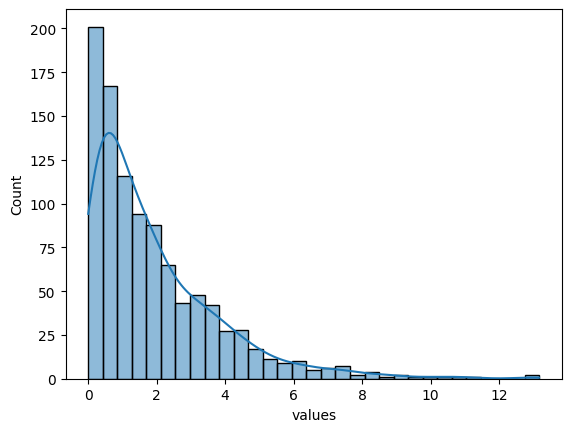

In [51]:
sns.histplot(data["values"],kde=True)

Power transformer 
1. Box-cox ( Used for non negative numbers)
2. Yeo-johnson (It can be used for positive as well as negative numbers)
   
Quantile transformer

In [52]:
# Power transformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

In [53]:
pt_box_cox=PowerTransformer(method="box-cox")

In [54]:
data["box_cox"]=pt_box_cox.fit_transform(data[["values"]])
data

,values,box_cox
0,0.255405,-1.164964
1,0.875668,-0.331726
2,0.478539,-0.775132
3,1.407127,0.071031
4,1.714977,0.254972
...,...,...
995,0.688461,-0.516985
996,1.519533,0.141310
997,4.284379,1.247479
998,0.601439,-0.615882


In [55]:
pt_yeo_johnson=PowerTransformer(method="yeo-johnson")

In [56]:
data["yeo_johnson"]=pt_yeo_johnson.fit_transform(data[["values"]])
data

,values,box_cox,yeo_johnson
0,0.255405,-1.164964,-1.259130
1,0.875668,-0.331726,-0.406364
2,0.478539,-0.775132,-0.896960
3,1.407127,0.071031,0.065515
4,1.714977,0.254972,0.278666
...,...,...,...
995,0.688461,-0.516985,-0.618097
996,1.519533,0.141310,0.147419
997,4.284379,1.247479,1.307064
998,0.601439,-0.615882,-0.727672


In [57]:
qt=QuantileTransformer(output_distribution="normal")

In [58]:
data["quantile"]=qt.fit_transform(data[["values"]])
data

,values,box_cox,yeo_johnson,quantile
0,0.255405,-1.164964,-1.259130,-1.088723
1,0.875668,-0.331726,-0.406364,-0.325577
2,0.478539,-0.775132,-0.896960,-0.761353
3,1.407127,0.071031,0.065515,0.048948
4,1.714977,0.254972,0.278666,0.213636
...,...,...,...,...
995,0.688461,-0.516985,-0.618097,-0.506348
996,1.519533,0.141310,0.147419,0.104318
997,4.284379,1.247479,1.307064,1.236652
998,0.601439,-0.615882,-0.727672,-0.605955


c:\Users\adeel\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


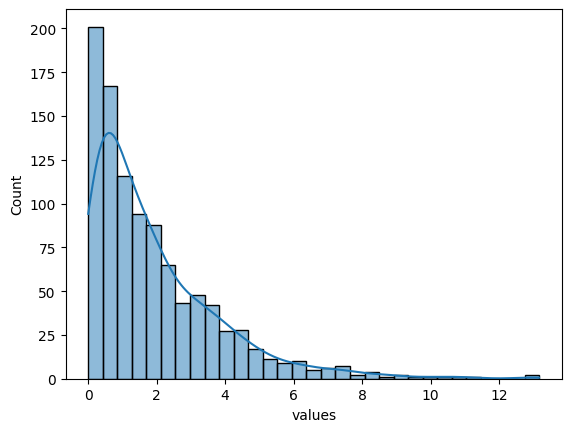

c:\Users\adeel\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


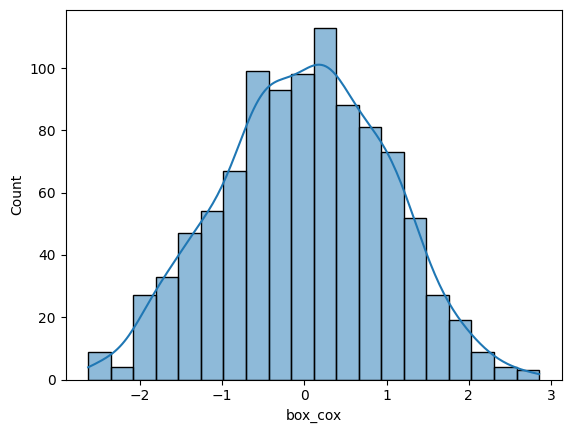

c:\Users\adeel\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


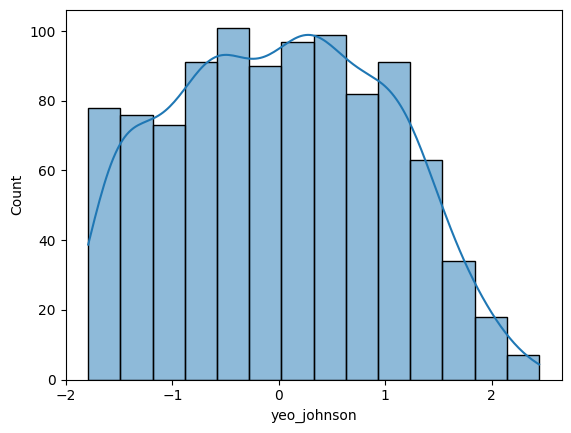

c:\Users\adeel\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


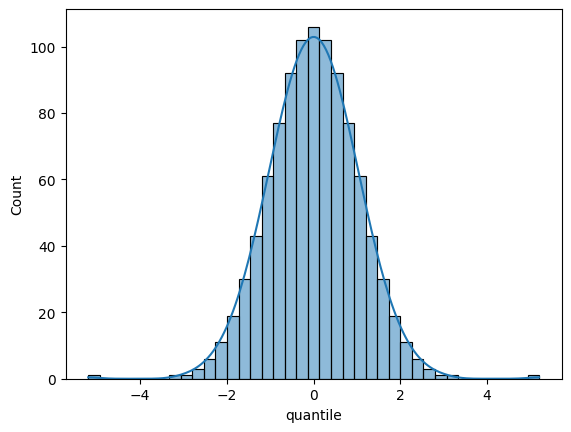

In [59]:
for col in data:
    sns.histplot(data[col],kde=True)
    plt.show()

## Normalization

L1 normalization=i.e. sum of absolute values of each row is 1
L2 normalization=i.e. sum of squares of each row is 1

In [60]:
from sklearn.preprocessing import Normalizer

In [61]:
X=[[1,1,1],
   [1,1,0],
   [1,0,0]]

In [62]:
x_normalized=Normalizer(norm="l2")

In [63]:
x_normalized.fit_transform(X)

array([[0.57735027, 0.57735027, 0.57735027],
       [0.70710678, 0.70710678, 0.        ],
       [1.        , 0.        , 0.        ]])

## Feature encoding

Label encoding

one hot encoding

ordinal encoding

Binary encoding

In [64]:
df.head(15)

,survived,pclass,gender,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,29.699118,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.000000,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.000000,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.000000,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.000000,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [65]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder

In [66]:
le=LabelEncoder()

In [67]:
df["gender"]=le.fit_transform(df["gender"])

In [68]:
oe=OrdinalEncoder()

In [69]:
df["class"]=oe.fit_transform(df[["class"]])

In [79]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [71]:
# import the data
df=sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [88]:
# divide the dataset into features and target variables
X=df[["total_bill", "size"]]
y=df[["tip"]]

In [89]:
# split the data into training and testing
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2)

In [90]:
model=LinearRegression()

In [91]:
model.fit(X_train,y_train)

LinearRegression()

In [92]:
y_predict=model.predict(X_test)
y_predict

array([[2.0657733 ],
       [2.1527169 ],
       [3.09545824],
       [2.29421334],
       [2.94629031],
       [4.11491453],
       [4.3737163 ],
       [2.76387923],
       [2.67864041],
       [2.02144911],
       [3.53649504],
       [2.10242599],
       [2.159536  ],
       [3.10312974],
       [1.65321741],
       [4.0988952 ],
       [2.42292396],
       [2.30273722],
       [1.91063865],
       [2.03849688],
       [2.44508605],
       [2.5499298 ],
       [2.63687339],
       [2.02315389],
       [2.07088763],
       [3.37862717],
       [3.40249404],
       [4.55033671],
       [2.57635383],
       [5.76446174],
       [3.79647344],
       [2.0444636 ],
       [2.13311197],
       [2.89258985],
       [2.05895419],
       [2.22687467],
       [2.52691532],
       [4.67851918],
       [2.52521054],
       [2.93282815],
       [6.35058058],
       [4.94378795],
       [3.7378347 ],
       [2.35643768],
       [2.90963762],
       [2.3402423 ],
       [3.02659085],
       [2.043

In [93]:
print(mean_absolute_error(y_test,y_predict))
print(mean_squared_error(y_test,y_predict))
print(r2_score(y_test,y_predict))

0.6796310531869687
0.957393609843101
0.5449498090732328


In [83]:
import pickle

In [84]:
pickle.dump(model, open("model.pkl","wb")) # save the model, wb=write binary

In [85]:
model_load=pickle.load(open("model.pkl","rb")) # load the model, rb=read binary

In [87]:
model_load.predict([[15]])

c:\Users\adeel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[2.53657038]])

Multiple linear regression